# Simulation du jeux de LIDO simplifié

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [1]:
# importation du module numpy avec le nom np
import numpy as np

### Simulation du lancé de dé

In [2]:
# fonction nommée Roll sans parametre qui retourne un nombre aleatoire compris entre 1 et 6
def Roll():
    return int(np.random.choice([1, 2, 3, 4, 5, 6], replace=True))

In [3]:
Roll()

1

### Compléter le code et commenter

In [4]:
# POS: la position du pion
POS = 0

# CIBLE: la position que le pion doit atteindre
CIBLE = 20

# NCOUP: le nombre de coup
NCOUP = 0

# temp: contient la valeur retourner par la fonction Roll()
temp = Roll()

# incrementation du nombre de coup
NCOUP += 1

# si Roll() retourne la valeur 6, le pion sort de sa prison
if temp == 6:
    # on affecte la valeur 1 à la variable POS
    POS = 1 
    
    # on affichera sur la console le nombre de coup, la valeur du variable temp et la position du pion
    print(NCOUP, temp, POS)

# sinon 
else:    
    # on entre dans le boucle while
    while temp != 6:
        # on incremente le nombre de coup dans chaque iteration
        NCOUP += 1
        temp = Roll()
        
        if temp == 6:
            # si la valeur de temp est egale à 6, le pion sort de sa prison 
            # et on affecte la valeur 1 à la variable POS
            POS = 1
            # on affichera sur la console le nombre de coup, la valeur du variable temp et la position du pion
            print(NCOUP, temp, POS)
            break 

        # le nombre de coup, la valeur du variable temp et la position du pion
        print(NCOUP, temp, POS)

# afficher le message suivant:
print(f'le pion est sortie de la prison aparés {NCOUP}')

# on entre dans la boucle while
while POS < CIBLE:
    # dans chaque iteration temp contient la valeur retourner par la fonction Roll()
    temp = Roll()
    
    # on incremente le nombre de coup dans chaque iteration
    NCOUP += 1
    
    # si la valeur de (POS + temp) est superieur à celle du CIBLE
    if POS + temp > CIBLE:
        # puis, on affiche sur la console le nombre de coup, la valeur du variable temp et la position du pion
        print(NCOUP, temp, POS)
        pass
    
    # sinon si la valeur de (POS + temp) égale à celle du CIBLE
    elif POS + temp == CIBLE:
        # on affiche sur la console le nombre de coup, la valeur du variable temp et la position du pion
        print(NCOUP, temp, CIBLE)
        
        # puis on affecte la valeur de CIBLE au variable POS 
        POS = CIBLE
    
    # sinon
    else:
        # on incremente la valeur du variable POS avec celle du temp
        POS += temp
        
        # puis, on affiche sur la console le nombre de coup, la valeur du variable temp et la position du pion
        print(NCOUP, temp, POS)

# afficher le message suivant:
print(f"le jeux est terminé aprés {NCOUP} coups")

2 4 0
3 3 0
4 3 0
5 5 0
6 2 0
7 2 0
8 1 0
9 4 0
10 4 0
11 4 0
12 4 0
13 4 0
14 6 1
le pion est sortie de la prison parés 14
15 5 6
16 3 9
17 3 12
18 1 13
19 1 14
20 2 16
21 2 18
22 3 18
23 4 18
24 4 18
25 3 18
26 1 19
27 6 19
28 1 20
le jeux est terminé aprés 28 coups


### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [6]:
def sim(CIBLE):
    POS = 0
    NCOUP = 0
    temp = Roll()
    NCOUP += 1
    if temp == 6:
        POS = 1 
    
    else: 
        while temp != 6:
            NCOUP += 1
            temp = Roll()
            if temp == 6:
                POS = 1
                break 
    
    while POS<CIBLE:
        temp = Roll()
        NCOUP += 1
        if POS + temp > CIBLE:
            pass
        
        elif POS + temp == CIBLE:
            POS = CIBLE
        
        else:
            POS += temp
        
    return NCOUP

In [25]:
print(sim(20))

19


In [8]:
L = [sim(20) for _ in range(100000)]

# moyenne des nombres de coup 
moy = sum(L) / 100000
print(moy)

16.20806


In [9]:
# liste des cibles
cibles = [20, 25, 30, 35, 45]

# liste des moyennes
moyenne = [sum([sim(v) for _ in range(50000)]) / 50000 for v in cibles]

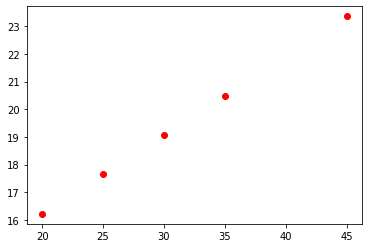

In [10]:
import matplotlib.pyplot as plt

plt.plot(cibles, moyenne, "ro")
plt.show()

In [11]:
from scipy import stats

slope , intercept, r_value, p_value, std_err = stats.linregress(cibles, moyenne)
print(f'la valeur de a est {slope} et la valeur de b est {intercept}')

la valeur de a est 0.2854583783783783 et la valeur de b est 10.502530270270272


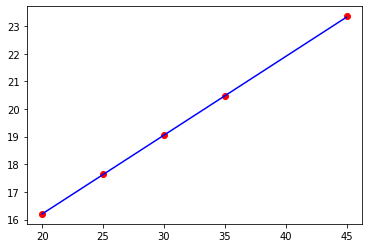

In [17]:
import matplotlib.pyplot as plt

plt.plot(cibles, moyenne, "ro")
t = np.linspace(20, 45, 1001)
y = 0.285 * t + intercept
plt.plot(t, y, "-b")
plt.show()

### Simulation de $10^5$  scénario 

In [13]:
Freq=np.fromiter((sim(20) for i in range(10**5)),dtype=int)

In [14]:
ESP=Freq.sum()/10**5

In [15]:
x=list(range(10,20))

In [16]:
y=[np.fromiter((sim(u) for i in range(5*10**4)),dtype=int).sum()/50000 for u in x]

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

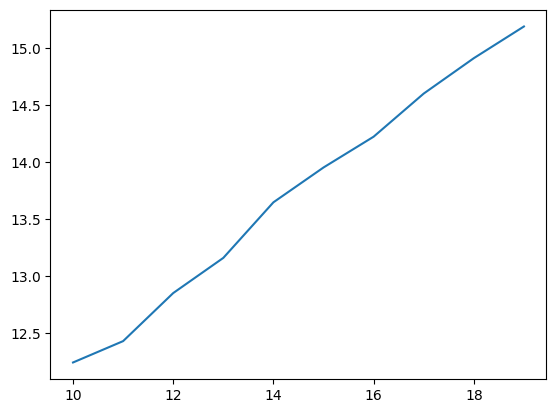

In [ ]:
plt.plot(x,y)

In [ ]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [ ]:
slope

0.3407989090909091

In [ ]:
intercept


8.779865818181818